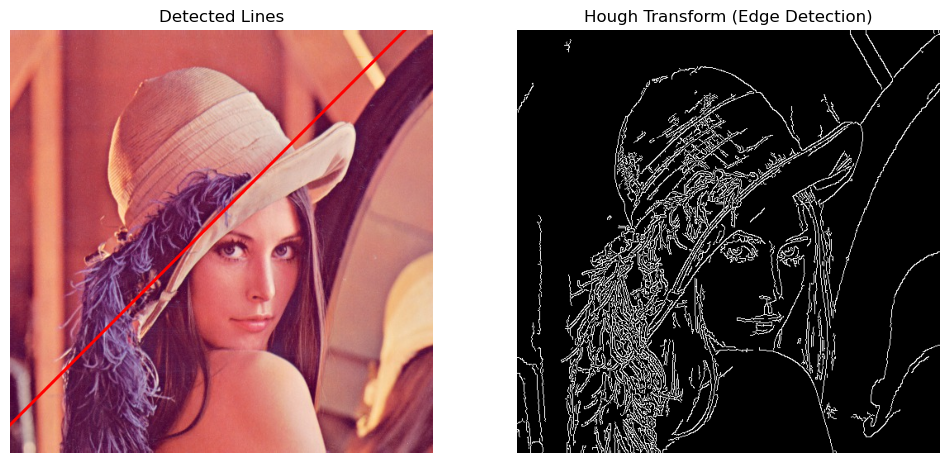

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines_hough(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Perform Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    # Draw the detected lines on the image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Plot the original image with detected lines
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines")
    plt.axis("off")
    
    # Plot the Hough Transform space
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Hough Transform (Edge Detection)")
    plt.axis("off")
    
    plt.show()

# Example usage
detect_lines_hough(r)


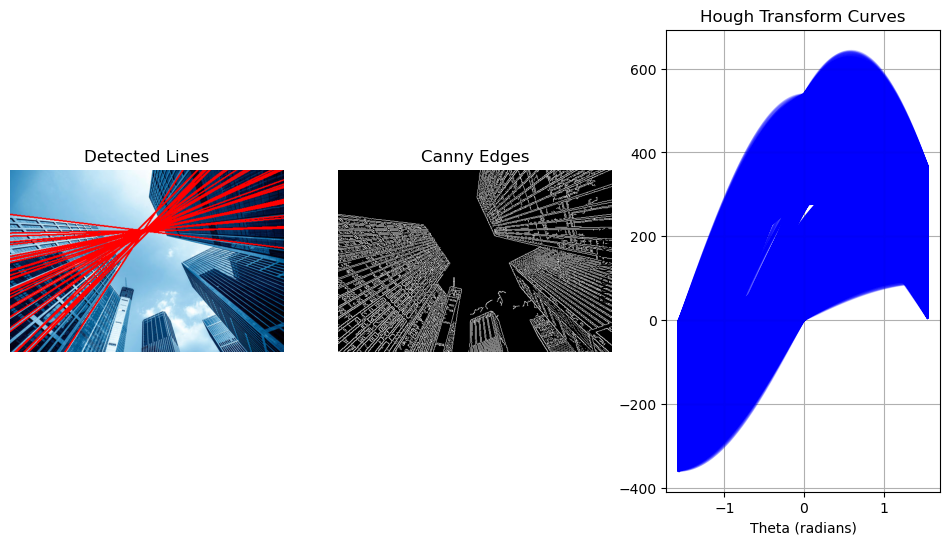

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines_hough(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Perform Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    # Draw the detected lines on the image
    image_with_lines = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Plot the original image with detected lines
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines")
    plt.axis("off")
    
    # Plot the Hough Transform space
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis("off")
    
    # Plot the Hough Transform curves
    plt.subplot(1, 3, 3)
    h, w = edges.shape
    theta_range = np.deg2rad(np.arange(-90, 90))
    
    for y in range(h):
        for x in range(w):
            if edges[y, x]:  # If it's an edge point
                rho_values = x * np.cos(theta_range) + y * np.sin(theta_range)
                plt.plot(theta_range, rho_values, color='blue', alpha=0.1)
    
    plt.title("Hough Transform Curves")
    plt.xlabel("Theta (radians)")
    plt.ylabel("Rho (pixels)")
    plt.grid(True)
    
    plt.show()

# Example usage
detect_lines_hough(r"D:\360_F_281897358_3rj9ZBSZHo5s0L1ug7uuIHadSxh9Cc75.jpg")


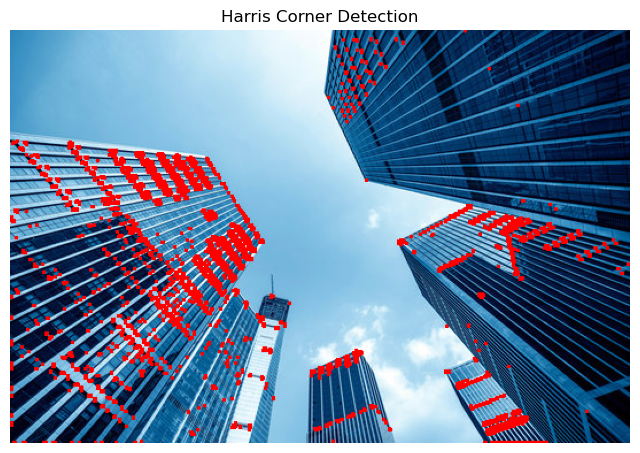

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    """
    Detect corners in an image using the Harris corner detection method.
    
    Parameters:
    - image_path: Path to the input image.
    - block_size: Neighborhood size considered for corner detection.
    - ksize: Aperture parameter for the Sobel operator.
    - k: Harris detector free parameter.
    - threshold: Threshold value to consider strong corners.
    
    Displays the image with detected corners.
    """
    # Load image in grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Convert to float32
    gray = np.float32(gray)
    
    # Apply Harris corner detector
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Dilate the result for marking the corners
    dst = cv2.dilate(dst, None)
    
    # Mark the corners on the original image
    img[dst > threshold * dst.max()] = [0, 0, 255]  # Mark corners in red
    
    # Convert BGR image to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Show the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Harris Corner Detection')
    plt.show()

# Example usage
detect_harris_corners(r"D:\360_F_281897358_3rj9ZBSZHo5s0L1ug7uuIHadSxh9Cc75.jpg")


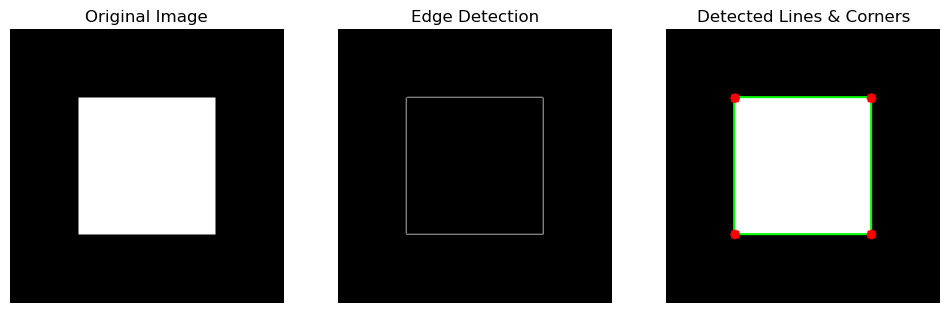

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_white_square_image(size=(400, 400), square_size=200):
    """
    Create a black image with a centered white square.
    """
    img = np.zeros(size, dtype=np.uint8)
    start = (size[0] - square_size) // 2
    end = start + square_size
    img[start:end, start:end] = 255
    return img

def detect_harris_corners(image, block_size=2, ksize=3, k=0.04, threshold=0.01):
    """
    Detect corners in an image using the Harris corner detection method.
    """
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)
    corners = np.argwhere(dst > threshold * dst.max())
    return corners

def detect_hough_lines(image):
    """
    Detect lines in an image using the Hough Transform.
    """
    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
    return lines, edges

def main():
    # Create image with white square
    img = create_white_square_image()
    
    # Detect edges and lines using Hough Transform
    lines, edges = detect_hough_lines(img)
    
    # Detect corners using Harris Corner Detection
    corners = detect_harris_corners(img)
    
    # Convert grayscale to color for visualization
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_color, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines
    
    # Mark detected corners
    for y, x in corners:
        cv2.circle(img_color, (x, y), 5, (0, 0, 255), -1)  # Red corners
    
    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines & Corners')
    plt.axis('off')
    
    plt.show()

if __name__ == "__main__":
    main()


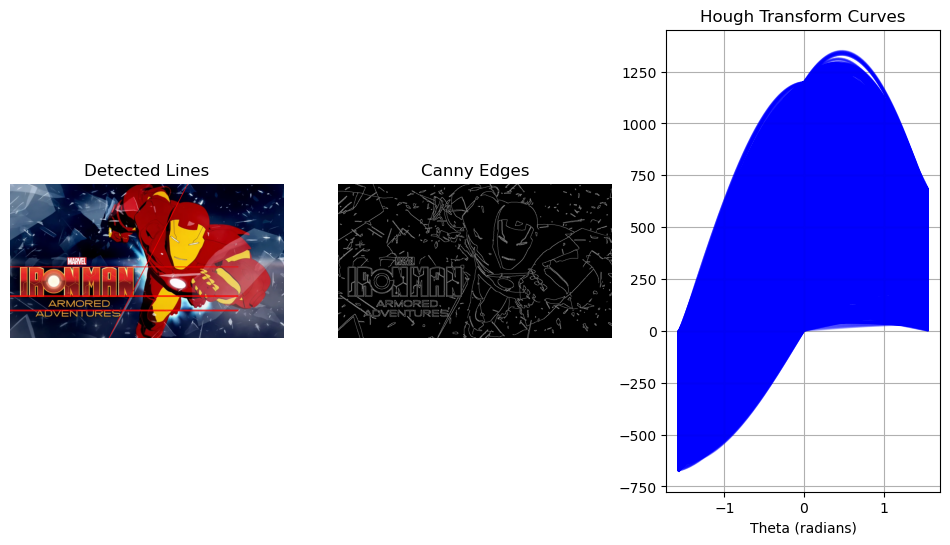

In [5]:
detect_lines_hough(r"D:\scale.webp")

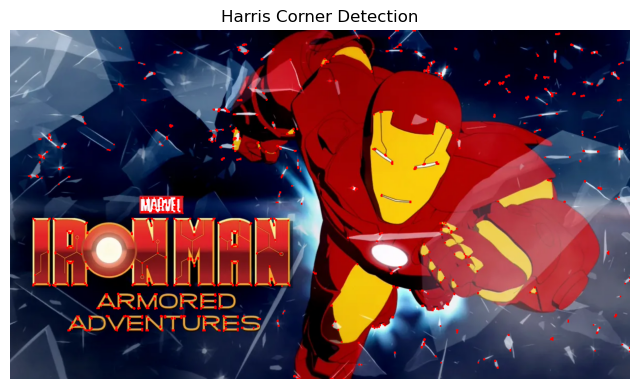

In [3]:
# Example usage
detect_harris_corners(r"D:\scale.webp")